### PQ

In [ ]:
# PQ, 정중앙 대학교

import heapq
A = [-500] # max heap
B = [] # min heap

n = int(input())
for _ in range(n):
    n1, n2 = map(int, input().split())

    heapq.heappush(A, -n1)
    heapq.heappush(B, n2)

    if -A[0] > B[0]:
        Go_B = -heapq.heappop(A)
        Go_A = heapq.heappop(B)
        heapq.heappush(A, -Go_A)
        heapq.heappush(B, Go_B)

In [ ]:
# 백준 1665 가운데를 말해요
# PQ, median

import heapq
A = []
B = []

n = int(input())
for _ in range(n):
    num = int(input())

    if len(A) == len(B):
        heapq.heappush(A, -num)

    else:
        heapq.heappush(B, num)

    if A and B:
        if -A[0] > B[0]:
            Go_B = -heapq.heappop(A)
            Go_A = heapq.heappop(B)
            heapq.heappush(A, -Go_A)
            heapq.heappush(B, Go_B)

    print(-A[0])

### DP

In [ ]:
# 15486 퇴사2  
# 현재 위치 이전에 최대값을 찾아서 연산해야 한다.
# 그래야 최종적으로 최대값을 찾을 수 있다.

n = int(input())
lst = [tuple(map(int, input().split())) for i in range(n)]
DP = [0] * (n + 1)

MAX = 0
for i in range(n):
    MAX = max(DP[i], MAX)
    if lst[i][0] <= n - i:
        DP[i + lst[i][0]] = max(MAX + lst[i][1], DP[i + lst[i][0]])

print(max(DP))

### 펜윅 트리

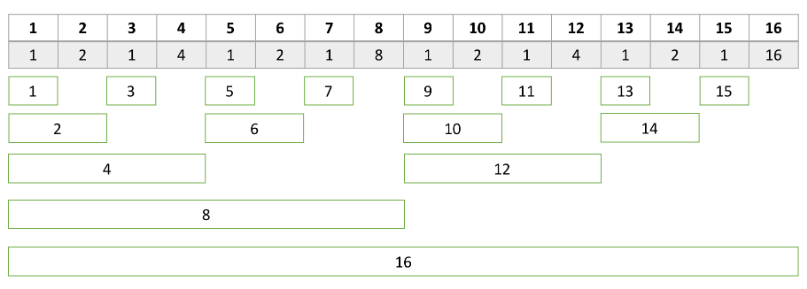

구간합, 구간 최대, 구간 최소 등... 잦은 갱신과 쿼리로 인해서 $O(NM)$ 으로 풀 수 없는 문제들이 다수 존재한다.  
(여기서 N은 배열의 크기를, M은 쿼리의 숫자를 의미한다.)

갱신에 유리하고 연산의 횟수를 줄이기 위해서 보통 사용하는 것은 세그먼트 트리를 사용하는데,  
이에 대해서도 그렇게 쉽지만은 않은 것을 알 수 있다.  

In [ ]:
# https://www.acmicpc.net/problem/2042

def change(v, gap):
    global tree

    while v != 0:
        tree[v] += gap
        v //= 2


def calc(start, end):
    global tree

    S = 0
    while start <= end:
        if start % 2 == 1:
            S += tree[start]
        if end % 2 == 0:
            S += tree[end]

        start = (start + 1) // 2
        end = (end - 1) // 2

    return S


n, m, k = map(int, input().split())

temp = n
t = 0

while temp > 2 ** t:
    t += 1

T = t + 1
gap1 = 2 ** t
size  = 2 ** T
tree = [0] * size

for i in range(n):
    tree[gap1 + i] = int(input())

for i in range(size - 1, 1, -1):
    tree[i // 2] += tree[i]

for _ in range(m + k):
    a, b, c = map(int, input().split())

    if a == 1:
        temp = b + gap1 - 1
        gap = c - tree[temp]
        change(temp, gap)
    else:
        print(calc(b + gap1 - 1, c + gap1 - 1))